In [ ]:
ameliorer hyperparamètre DBSCAN
Ajouter des colonnes feature transformation
Pipeline.
Prez


# Librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# data

In [2]:
path = 'Mall_Customers.csv'
df = pd.read_csv(path)
display(df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

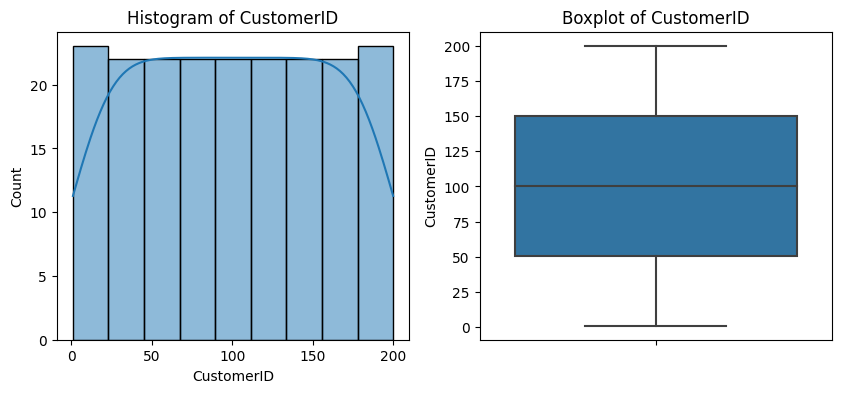

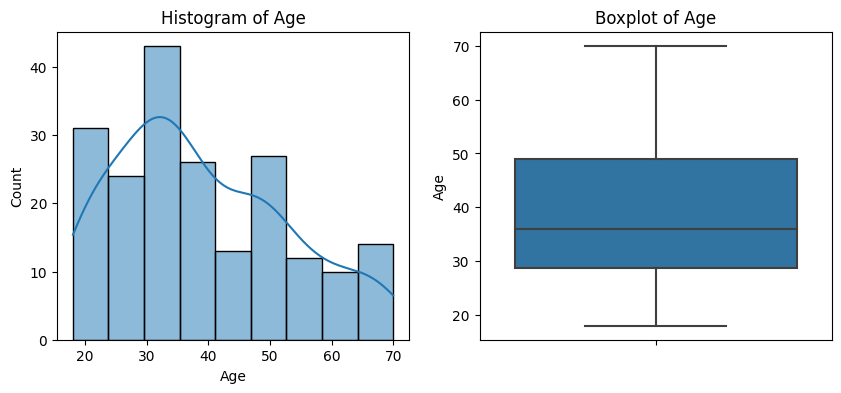

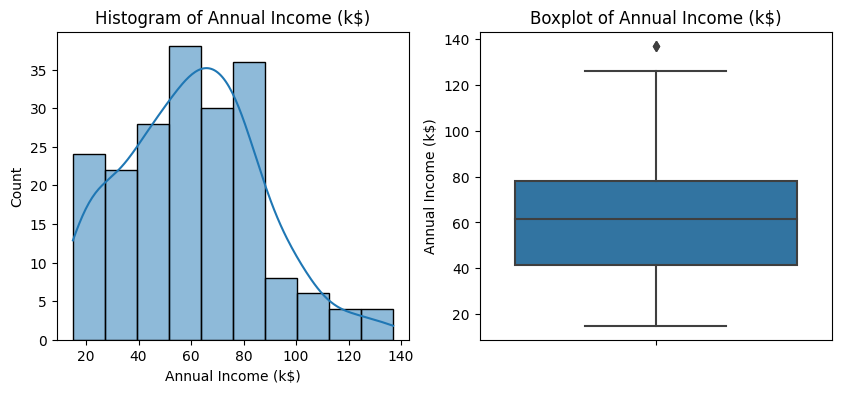

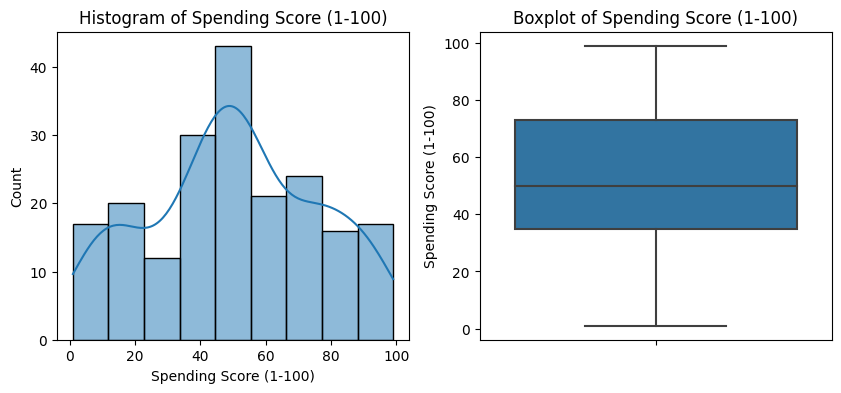

In [6]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

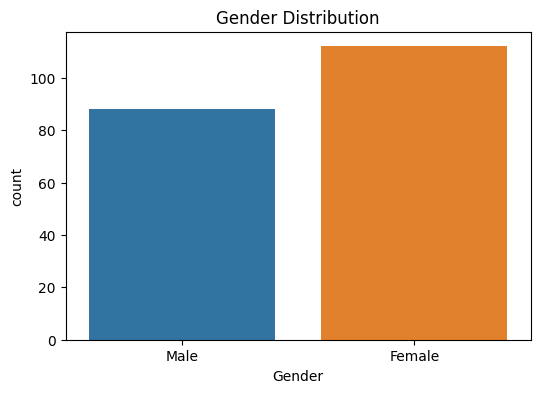

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

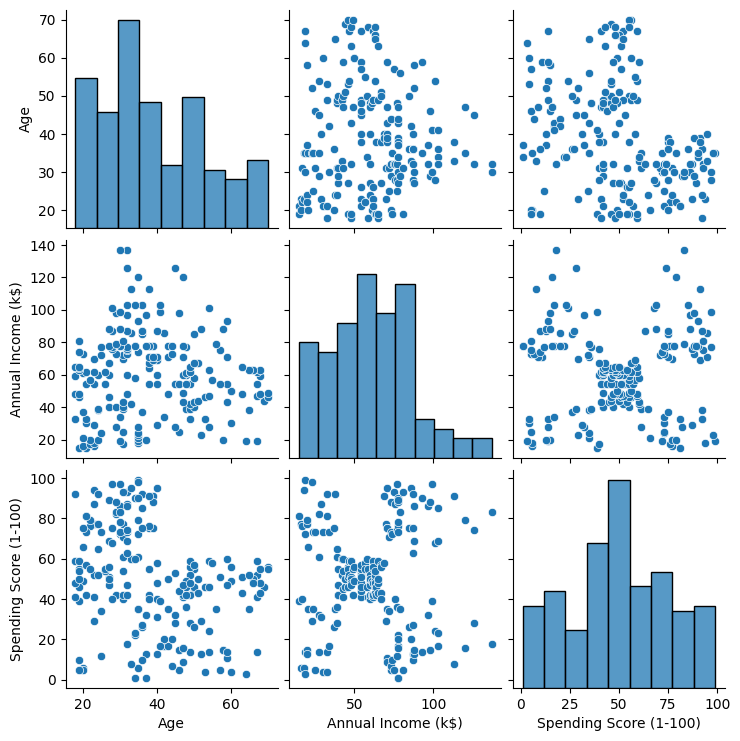

In [8]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

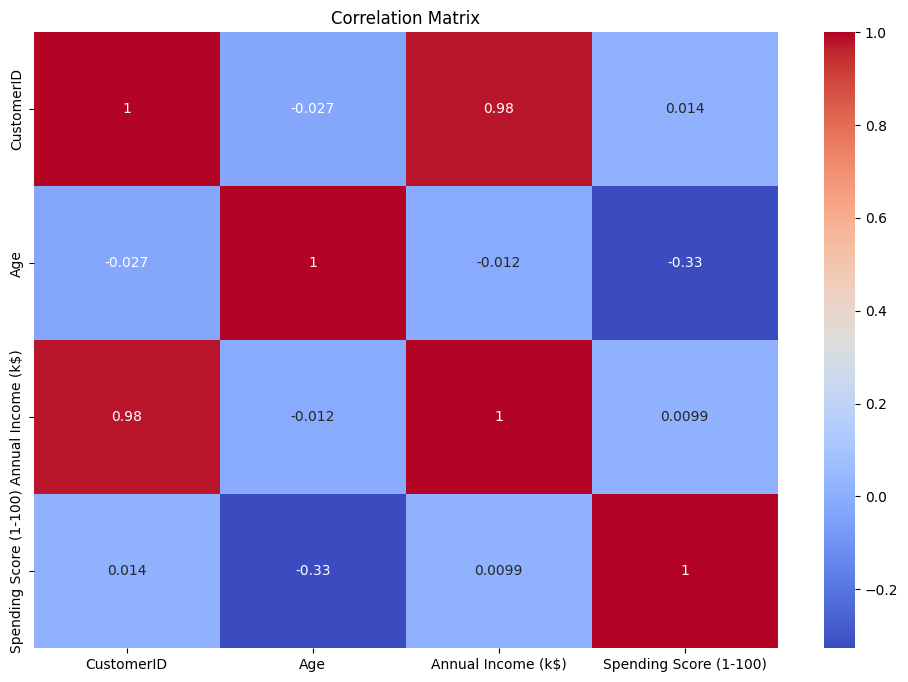

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

In [10]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
scaled_df['Gender'] = df['Gender']

scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


# nombre de cluster - Methode Elbow

In [11]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

/home/mathieu/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mathieu/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mathieu/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mathieu/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/si

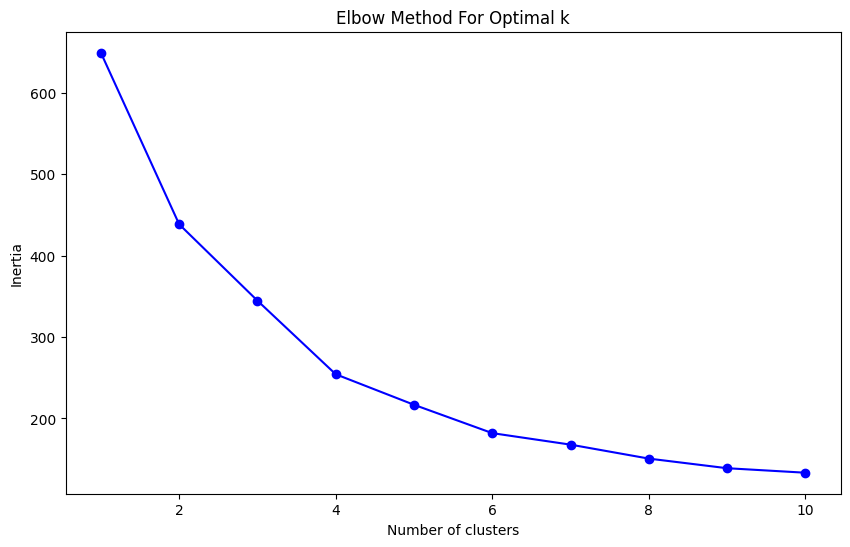

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Modèle Kmeans

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df)

/home/mathieu/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [14]:
df['Cluster'] = kmeans.labels_

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,4
2,3,0,20,16,6,2
3,4,0,23,16,77,4
4,5,0,31,17,40,2


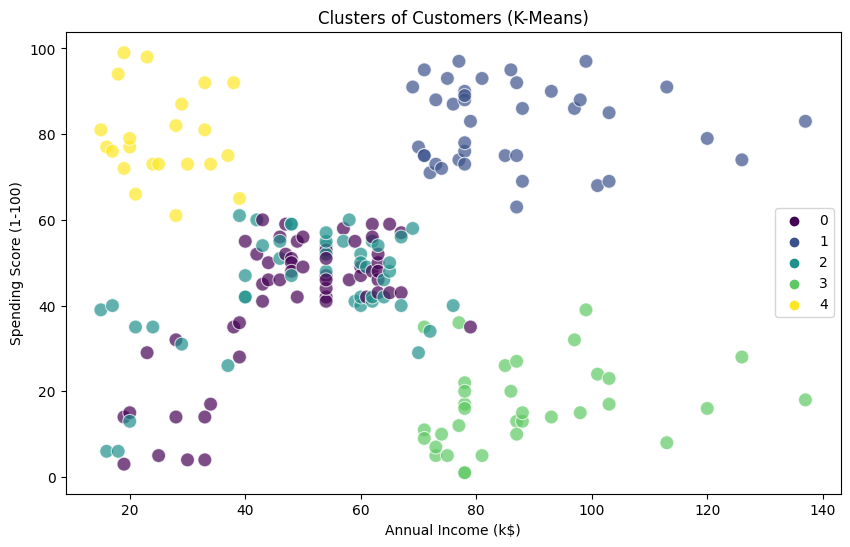

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

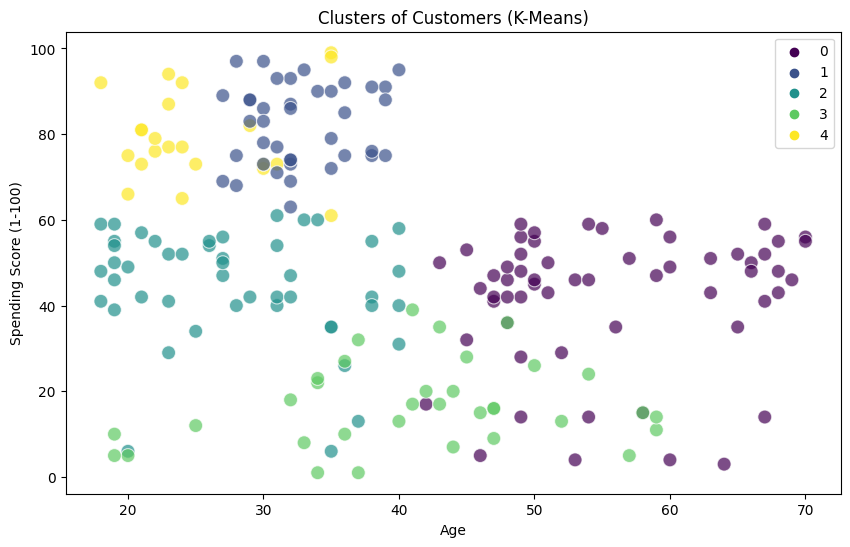

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (K-Means)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierarchical Clustering

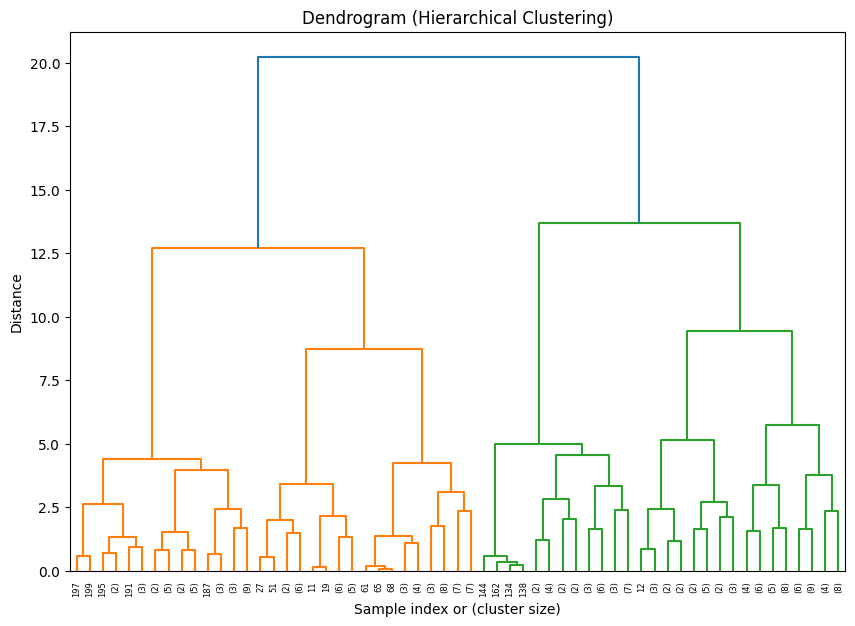

In [18]:
linked = linkage(scaled_df, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

In [19]:
agg_cluster = AgglomerativeClustering(n_clusters=5)
df['Agg_Cluster'] = agg_cluster.fit_predict(scaled_df)

df.head(50)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Agg_Cluster
0,1,1,19,15,39,2,4
1,2,1,21,15,81,4,0
2,3,0,20,16,6,2,4
3,4,0,23,16,77,4,0
4,5,0,31,17,40,2,4
5,6,0,22,17,76,4,0
6,7,0,35,18,6,2,4
7,8,0,23,18,94,4,0
8,9,1,64,19,3,0,4
9,10,0,30,19,72,4,0


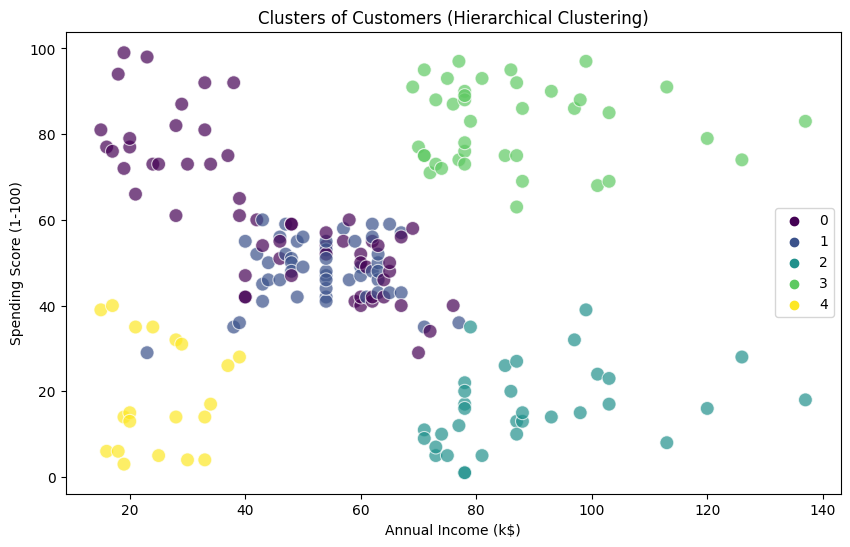

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agg_Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (Hierarchical Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

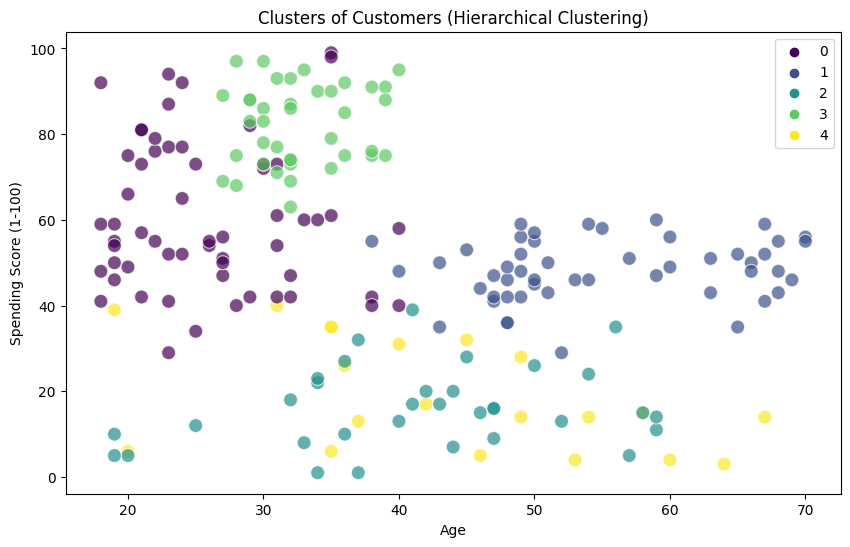

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Agg_Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (Hierarchical Clustering)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# analyse détaillé par cluster

## Kmeans

In [22]:
kmeans_summary = df.groupby('Cluster').mean()

kmeans_summary['Age_std'] = df.groupby('Cluster')['Age'].std()
kmeans_summary['Annual Income (k$)_std'] = df.groupby('Cluster')['Annual Income (k$)'].std()
kmeans_summary['Spending Score (1-100)_std'] = df.groupby('Cluster')['Spending Score (1-100)'].std()

kmeans_summary

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Agg_Cluster,Age_std,Annual Income (k$)_std,Spending Score (1-100)_std
Cluster,,,,,,,,,
0,71.051724,0.431034,55.551724,48.482759,41.775862,1.586207,8.324920,13.797077,15.658688
1,162.000000,0.461538,32.692308,86.538462,82.128205,3.000000,3.728650,16.312485,9.364489
2,75.723404,0.340426,27.957447,50.000000,44.638298,0.808511,7.309783,16.704595,13.029107
3,164.529412,0.588235,41.264706,88.500000,16.764706,1.941176,10.768385,16.533254,9.881292
4,23.090909,0.409091,25.272727,25.727273,79.363636,0.000000,5.257030,7.566731,10.504174


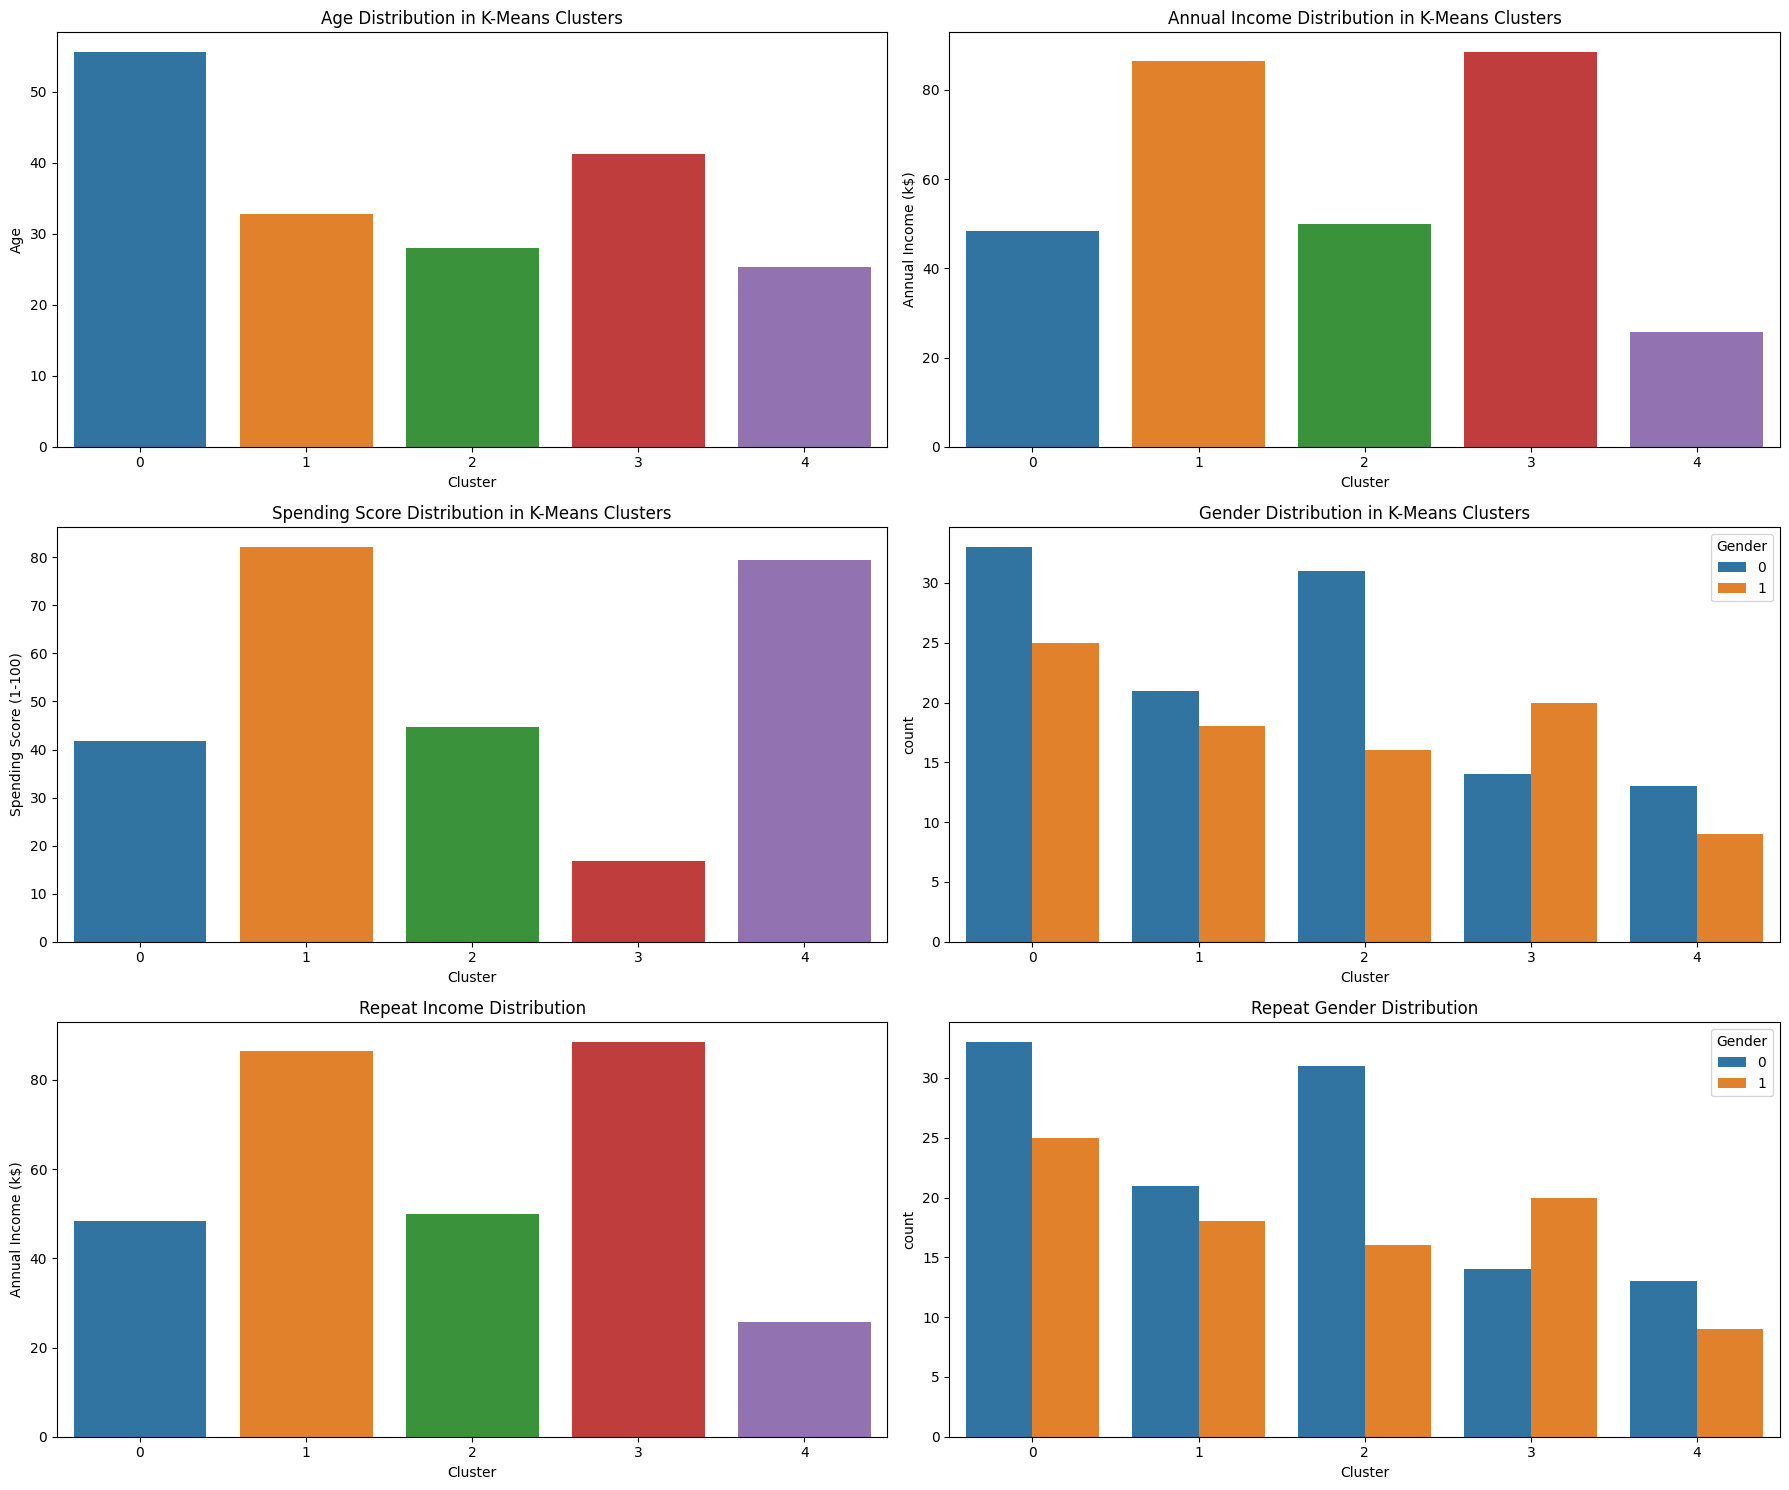

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

sns.barplot(x='Cluster', y='Age', data=df, ax=axes[0, 0], ci=None)
axes[0, 0].set_title('Age Distribution in K-Means Clusters')

sns.barplot(x='Cluster', y='Annual Income (k$)', data=df, ax=axes[0, 1], ci=None)
axes[0, 1].set_title('Annual Income Distribution in K-Means Clusters')

sns.barplot(x='Cluster', y='Spending Score (1-100)', data=df, ax=axes[1, 0], ci=None)
axes[1, 0].set_title('Spending Score Distribution in K-Means Clusters')

sns.countplot(x='Cluster', hue='Gender', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution in K-Means Clusters')

# Add new plots to the last two subplots
sns.barplot(x='Cluster', y='Annual Income (k$)', data=df, ax=axes[2, 0], ci=None)
axes[2, 0].set_title('Repeat Income Distribution')

sns.countplot(x='Cluster', hue='Gender', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Repeat Gender Distribution')

plt.tight_layout()
plt.show()


## Hierachical cluster

In [24]:
agg_summary = df.groupby('Agg_Cluster').mean()

agg_summary['Age_std'] =df.groupby('Agg_Cluster')['Age'].std()
agg_summary['Annual Income (k$)_std'] = df.groupby('Agg_Cluster')['Annual Income (k$)'].std()
agg_summary['Spending Score (1-100)_std'] = df.groupby('Agg_Cluster')['Spending Score (1-100)'].std()

agg_summary


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Age_std,Annual Income (k$)_std,Spending Score (1-100)_std
Agg_Cluster,,,,,,,,,
0,65.000000,0.344828,25.931034,45.017241,60.517241,2.758621,6.098208,17.773913,17.347067
1,82.100000,0.500000,54.960000,53.620000,48.240000,0.200000,9.021426,10.020163,7.133022
2,166.090909,0.545455,41.454545,89.090909,16.181818,2.909091,11.172206,16.451375,9.422230
3,162.000000,0.461538,32.692308,86.538462,82.128205,1.000000,3.728650,16.312485,9.364489
4,21.300000,0.350000,43.750000,25.250000,19.050000,0.900000,13.301662,7.397546,12.910522


## synthèse

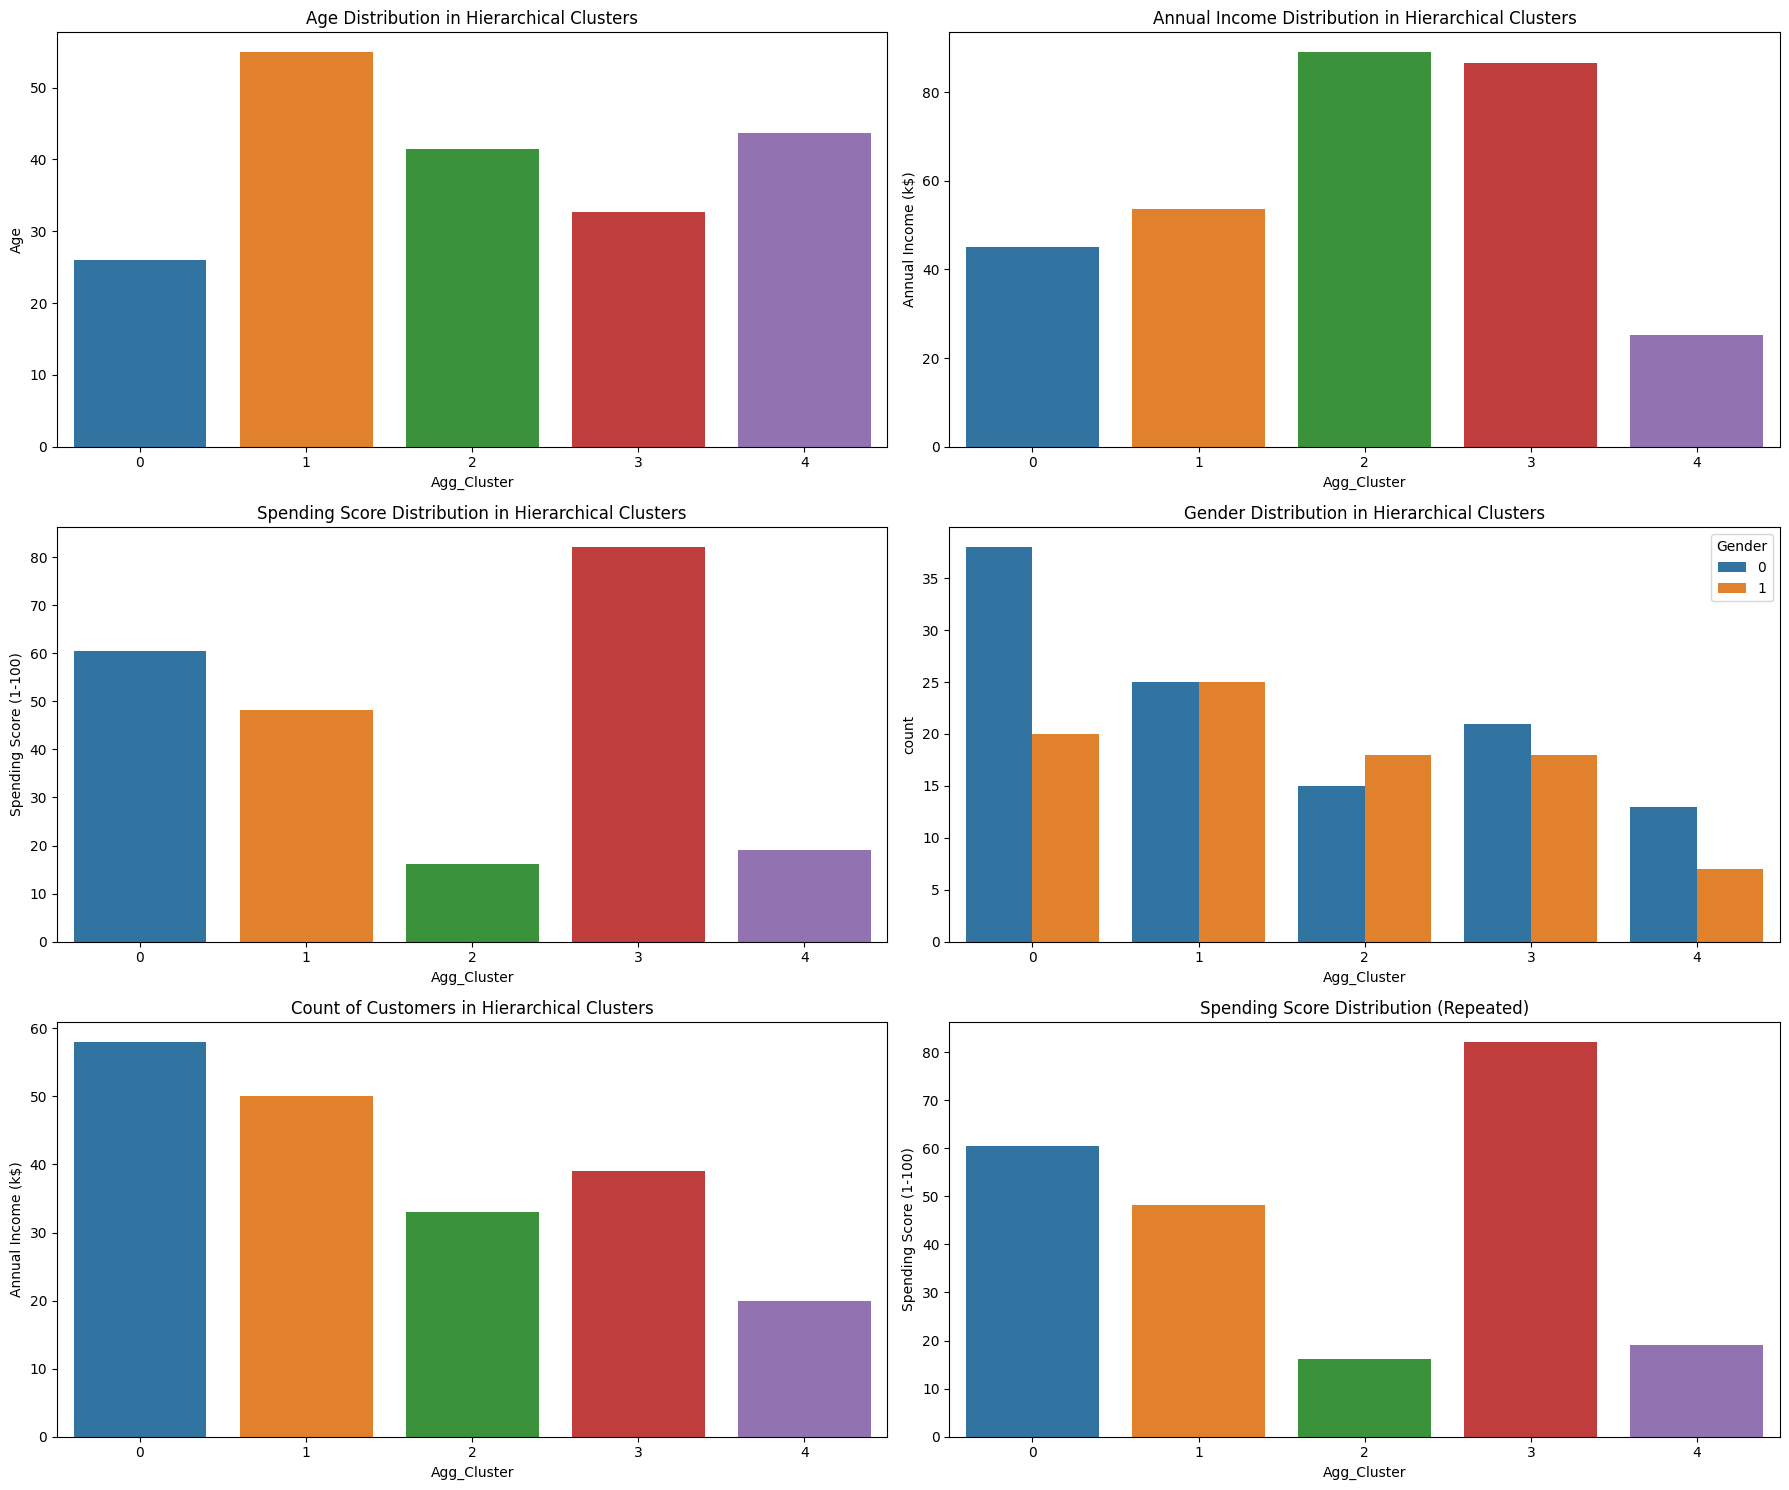

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

sns.barplot(x='Agg_Cluster', y='Age', data=df, ax=axes[0, 0], ci=None)
axes[0, 0].set_title('Age Distribution in Hierarchical Clusters')

sns.barplot(x='Agg_Cluster', y='Annual Income (k$)', data=df, ax=axes[0, 1], ci=None)
axes[0, 1].set_title('Annual Income Distribution in Hierarchical Clusters')

sns.barplot(x='Agg_Cluster', y='Spending Score (1-100)', data=df, ax=axes[1, 0], ci=None)
axes[1, 0].set_title('Spending Score Distribution in Hierarchical Clusters')

sns.countplot(x='Agg_Cluster', hue='Gender', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution in Hierarchical Clusters')

# Adding additional plots to the last two subplots
sns.barplot(x='Agg_Cluster', y='Annual Income (k$)', data=df, ax=axes[2, 0], estimator=lambda x: len(x))
axes[2, 0].set_title('Count of Customers in Hierarchical Clusters')

sns.barplot(x='Agg_Cluster', y='Spending Score (1-100)', data=df, ax=axes[2, 1], ci=None)
axes[2, 1].set_title('Spending Score Distribution (Repeated)')

plt.tight_layout()
plt.show()

# recomendation 

# DBSCAN

In [26]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled_df)
distances, indices = nbrs.kneighbors(scaled_df)


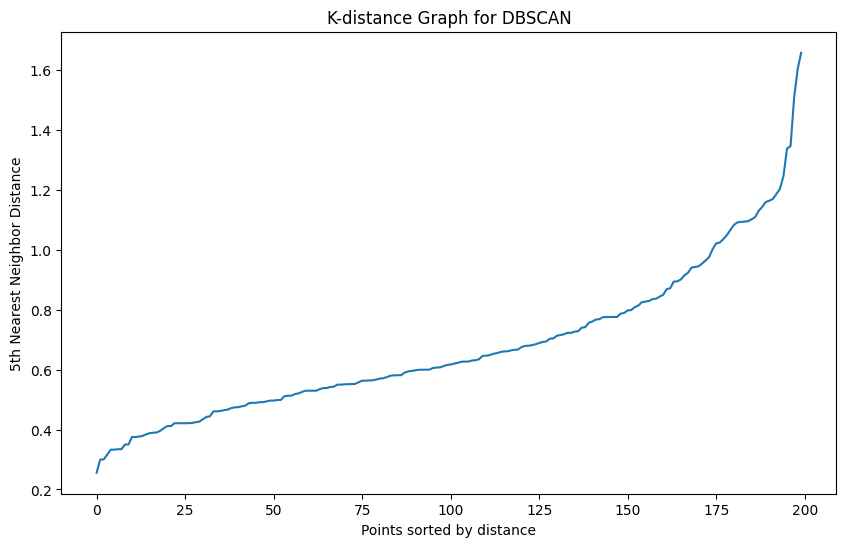

In [27]:
distances = np.sort(distances[:, 4])
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()

In [28]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_df)

In [29]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Agg_Cluster,DBSCAN_Cluster
0,1,1,19,15,39,2,4,-1
1,2,1,21,15,81,4,0,-1
2,3,0,20,16,6,2,4,-1
3,4,0,23,16,77,4,0,0
4,5,0,31,17,40,2,4,-1


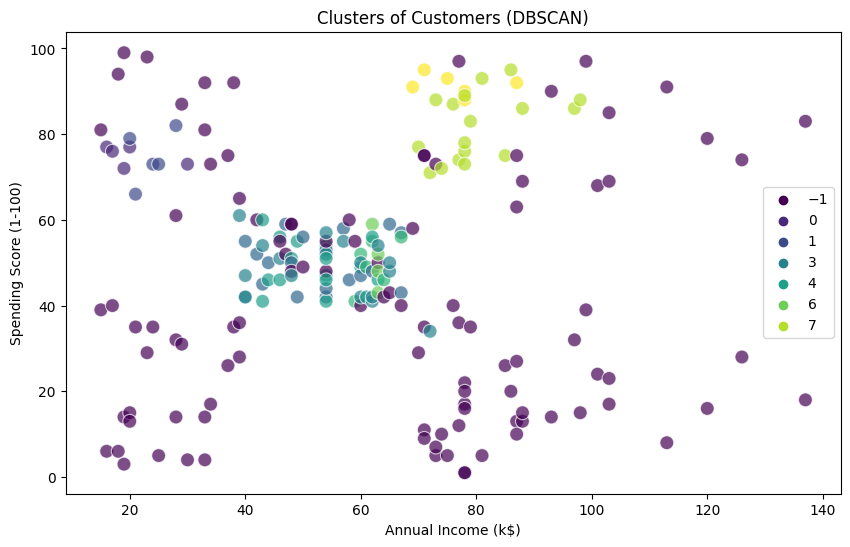

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (DBSCAN)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

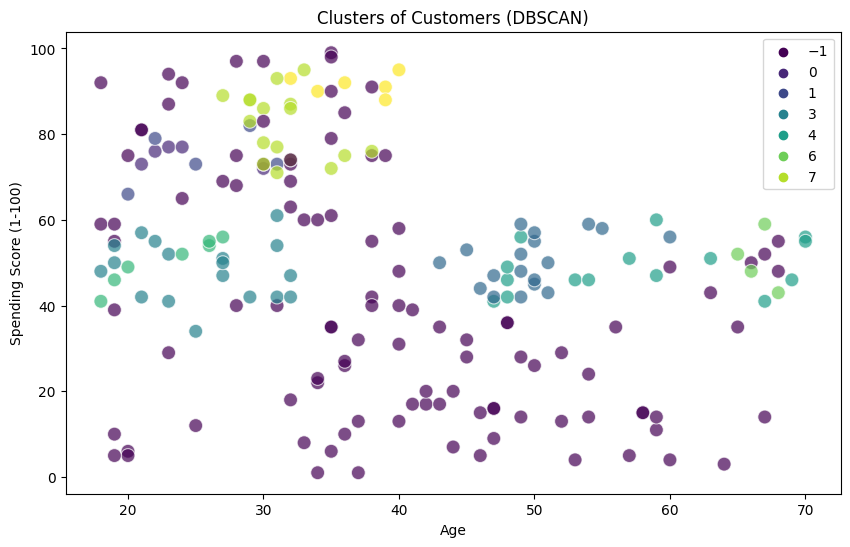

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (DBSCAN)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [32]:
dbscan_adjusted = DBSCAN(eps=0.6, min_samples=5)
df['DBSCAN_Cluster_Adj'] = dbscan_adjusted.fit_predict(scaled_df)

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Agg_Cluster,DBSCAN_Cluster,DBSCAN_Cluster_Adj
0,1,1,19,15,39,2,4,-1,-1
1,2,1,21,15,81,4,0,-1,1
2,3,0,20,16,6,2,4,-1,-1
3,4,0,23,16,77,4,0,0,0
4,5,0,31,17,40,2,4,-1,-1


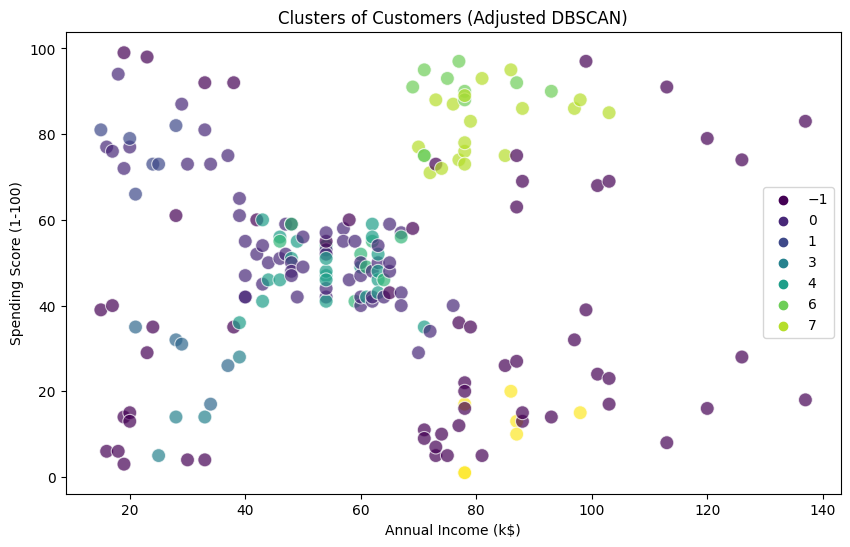

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster_Adj', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (Adjusted DBSCAN)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

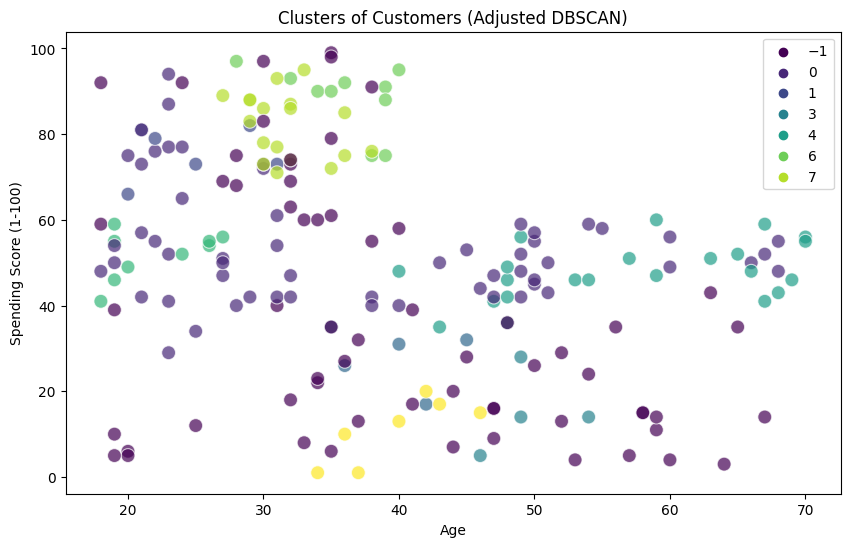

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='DBSCAN_Cluster_Adj', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (Adjusted DBSCAN)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Evaluation modeles

## Score silhouette

In [36]:
kmeans_silhouette = silhouette_score(scaled_df, df['Cluster'])
hierarchical_silhouette = silhouette_score(scaled_df, df['Agg_Cluster'])
dbscan_silhouette = silhouette_score(scaled_df, df['DBSCAN_Cluster_Adj'])

kmeans_silhouette, hierarchical_silhouette, dbscan_silhouette

(0.34977050035201074, 0.3477559149875169, -0.010962298270025324)

## Calinski-Harabasz Index

In [37]:
kmeans_ch_score = calinski_harabasz_score(scaled_df, df['Cluster'])
hierarchical_ch_score = calinski_harabasz_score(scaled_df, df['Agg_Cluster'])
dbscan_ch_score = calinski_harabasz_score(scaled_df, df['DBSCAN_Cluster_Adj'])

kmeans_ch_score, hierarchical_ch_score, dbscan_ch_score

(97.25832335913093, 91.27780236359015, 14.418133371573505)

## Davies Bouldin index

In [38]:
kmeans_db_score = davies_bouldin_score(scaled_df, df['Cluster'])
hierarchical_db_score = davies_bouldin_score(scaled_df, df['Agg_Cluster'])
dbscan_db_score = davies_bouldin_score(scaled_df, df['DBSCAN_Cluster_Adj'])

kmeans_db_score, hierarchical_db_score, dbscan_db_score

(1.0245227921150648, 1.068572515659686, 1.6698866874243508)

## Conclusion